(array([[1],
       [4],
       [1]]), 2)
(array([[10],
       [10],
       [ 4]]), 1)
(1000, 3)
(3, 1000)
[[5.9881052 ]
 [8.38970953]
 [2.        ]]
[[6103.75074483]
 [4725.00369084]
 [1000.        ]]


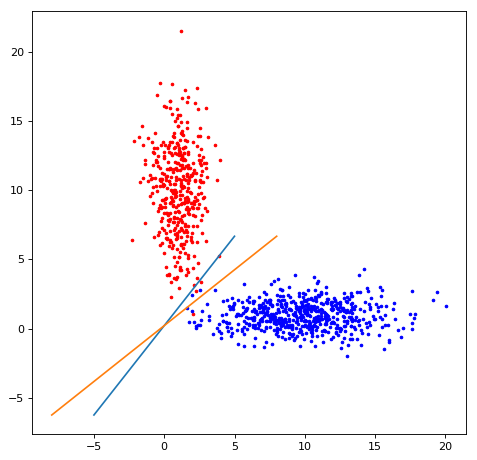

单样本，固定增量
迭代次数：2.000000:
花费时间：0.265650:
固定增量，批量修改
迭代次数：1.000000:
花费时间：0.166790:


In [8]:
import d2lzh as d2l
from mxnet.gluon import data as gdata
import numpy as np
import struct   #处理数据流
import sys
from time import time
sys.path.append("..")
from matplotlib import pyplot as plt


#生成两类正态样本
def genexam():
    z = [[[1.0, 0], [0, 10.0]],[[10.0, 0], [0, 1.0]]]
    u=[[1.0, 10.0],[10.0, 1.0]]
    a=[0.4,0.6]
    x1=[]
    x2=[]
    for i in range(1000):
        
        ui=np.random.multinomial(1,a,1)  #  按照给定的概率分布 决定 用哪个高斯分布生成样本
        ui=ui[0]
        if ui[0]==1:
            x1.append((np.random.multivariate_normal(u[0], z[0],1))[0]) #生成二维正态样本
            
        if ui[1]==1:
            x2.append((np.random.multivariate_normal(u[1], z[1],1))[0])
    x1=(np.array(x1).T)
    x2=(np.array(x2).T)
   
    x1=np.row_stack((x1,np.ones((1,x1.shape[1]))))  #添加一行为1的数据
    x2=np.row_stack((x2,np.ones((1,x2.shape[1]))))
    x3=np.hstack((x1,x2)).T
    print(x3.shape)
    return x1,x2,x3


#画图
def draw2(xx1,xx2,w_T,b_T1):
    fig = plt.figure(num=4, figsize=(7, 7),dpi=80) 
    ax1 = fig.add_subplot(1,1, 1)
    ax1.scatter(xx1[:, 0],xx1[:, 1], s=5, c='r')
    ax1.scatter(xx2[:, 0],xx2[:, 1], s=5, c='b')
   

    x = np.linspace(-5, 5)
    y = (b_T1[0]*x+b_T1[2])/b_T1[1]
    xx = np.linspace(-8, 8)
    yy = (w_T[0]*x+w_T[2])/w_T[1]
    
    ax1.plot(x, y)
    ax1.plot(xx, yy)
    
    plt.show()
   
   
    


#单样本更新W
def updateW(w_1,y,flag):
    a=w_1.reshape(1,3)
    b=y.reshape(3,1)
    c=np.dot(a[0],b)
    if c[0]<=0:
        flag=False  #有错继续循环 并更新w
        w_1=w_1.reshape(3,1)+y.reshape(3,1)
    
    return w_1,flag

#批量样本更新W
def batchupdateW(w_2,y):
    w_2=w_2.reshape(1,3)
    err=[]
    flag=True
    num2=0
    #循环 直到 没有错误分类
    while flag:
        num2+=1
        #判断样本是否分错，对错误的加入err
        for i in range(y.shape[1]):
            b=(y[:,i]).reshape(3,1)
            c=np.dot(w_2[0],b)
            if c[0]<=0:
                err.append(((y[:,i]).reshape(3,1)))
        err=np.array(err)
        
        #更新W
        for i in err:
            w_2=w_2.reshape(3,1)+i
        #所有样本都正确分类，跳出循环
        if err is not None:
            flag=False
        else :
            #err错误集付给y ,为之后循环更新样本集
            y=((np.mat(err)).T)
            w_2=w_2.reshape(1,3)
            #err清空
            err=[]  
        
    return w_2.reshape(3,1),num2


x=[[1,2,3,4],[4,3,2,1],[1,1,1,1]]
w=[[0],[0],[0]]
w=np.array(w)
x=np.array(x)


#单样本更新
def singupdate(w,x):
    flage=True
    #对所有样本更新，直到所有样本正确分类
    num1=0
    while flage:
        num1+=1
        for i in range(x.shape[1]):
            w,flage=updateW(w,x[:,i],flage)
        flage=bool(1-flage)   #都正确 flage 为false跳出循环， 还有没分对的则 flage 为true 继续循环
    return w,num1
w1=singupdate(w,x)
w=[[0],[0],[0]]
w=np.array(w)
w=batchupdateW(w,x)
print(w1)
print(w)

w=[[0],[0],[0]]
w=np.array(w)

#生成样本
xx1,xx2,xx3=genexam()
xx3=((np.mat(xx3)).T)
print(xx3.shape)
start1=time()
w21,num1=singupdate(w,xx3)
end1=time()-start1
w=[[0],[0],[0]]
w=np.array(w)
start2=time()
w22,num2=batchupdateW(w,xx3)
end2=time()-start2
print(w21)
print(w22)

draw2(xx1.T,xx2.T,w22,w22)


print('单样本，固定增量')
print('迭代次数：%f:'%(num1))
print('花费时间：%f:'%(end1))
print('固定增量，批量修改')
print('迭代次数：%f:'%(num2))
print('花费时间：%f:'%(end2))

In [8]:
a=[]
a=np.array(a)
print(a is not None)

True


In [27]:
help(np.ones)

Help on function ones in module numpy:

ones(shape, dtype=None, order='C')
    Return a new array of given shape and type, filled with ones.
    
    Parameters
    ----------
    shape : int or sequence of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: C
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    
    Returns
    -------
    out : ndarray
        Array of ones with the given shape, dtype, and order.
    
    See Also
    --------
    ones_like : Return an array of ones with shape and type of input.
    empty : Return a new uninitialized array.
    zeros : Return a new array setting values to zero.
    full : Return a new array of given shape filled with value.
    
    
    Examples
    --------
   